In [ ]:
#using python 3.11
!pip install tensorflow


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [7]:
import tensorflow as tf

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values between 0 and 1


print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", x_test.shape) 
print("Test labels shape:", y_test.shape)


Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)


1


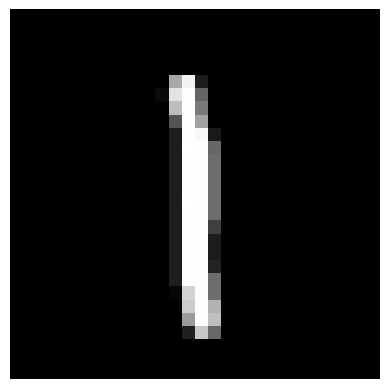

In [11]:
import matplotlib.pyplot as plt
idx = 14
print(y_train[idx])
plt.imshow(x_train[idx], cmap='gray')
plt.axis('off')
plt.show()

In [13]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [ ]:
# Normalize the data and reshape
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape images to (batch_size, sequence_length, features)
x_train = x_train.reshape(-1, 28*28, 1)  # Treat each pixel as a sequence element
x_test = x_test.reshape(-1, 28*28, 1)

# Convert labels to categorical
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Create a basic transformer model
def create_transformer_model():
    inputs = tf.keras.Input(shape=(784, 1))
    
    # Embedding layer
    x = tf.keras.layers.Dense(32)(inputs)
    
    # Transformer block
    transformer_block = tf.keras.layers.MultiHeadAttention(
        num_heads=2, key_dim=32
    )
    x = transformer_block(x, x)
    x = tf.keras.layers.LayerNormalization(epsilon=1e-6)(x)
    
    # Global average pooling
    x = tf.keras.layers.GlobalAveragePooling1D()(x)
    
    # Final dense layers
    x = tf.keras.layers.Dense(64, activation='relu')(x)
    outputs = tf.keras.layers.Dense(10, activation='softmax')(x)
    
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    return model

# Create and compile the model
model = create_transformer_model()
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=5,
    validation_split=0.1
)

W0000 00:00:1740511816.557000 3454125 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 602s 356ms/step - accuracy: 0.2207 - loss: 2.0996 - val_accuracy: 0.2678 - val_loss: 1.9530
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 595s 353ms/step - accuracy: 0.2508 - loss: 1.9722 - val_accuracy: 0.2597 - val_loss: 1.9387
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 596s 353ms/step - accuracy: 0.2622 - loss: 1.9371 - val_accuracy: 0.2667 - val_loss: 1.9246
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step - accuracy: 0.2696 - loss: 1.9198